# Clase #2 (script 2)

En este script se ejecutan procedimientos de carga de librerías, carga de datos y generación de tablas de frecuencias. Para este ejemplo se utilizará una base de datos llamada `blood.txt` la cual contiene información sobre la edad y presión sanguinea de 30 personas.

Este script supone que el directorio donde se encuentra almacenado es C:\. Si no es así, recuerde cambiar el valor de la variable path para que corresponda con la ubicación del script, y este se encuentre a la misma altura que la carpeta que la carpeta data. La carpeta `data` contiene la base de datos `blood.txt`.

Se inicia con la carga de librerías

In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 

## Cambiando el valor de la variable `path`

El comando `os.getcwd()` retorna la ruta donde se encuentra el directorio de trabajo actual.

In [2]:
os.getcwd()

'C:\\Users\\maorj\\Documents\\Miguel Orjuela\\dcd clase2-20181019T051430Z-001\\dcd clase2'

Las siguientes instrucciones cambian la ruta del directorio de trabajo actual a la que se especifica en la variable `path`.

In [3]:
path = "C:\\dcd2018"
os.chdir(path)

El comando `os.listdir(path)` muestra los archivos que se encuentran dentro de la ruta que entra como parámetro.

In [4]:
os.listdir(path)

['.ipynb_checkpoints',
 'clase2 ex1.py',
 'clase2 ex2.py',
 'clase2_script1.ipynb',
 'clase2_script2.ipynb',
 'data']

## Carga de datos en memoria

Verificando que la ruta de la base de datos es accesible, se procede a cargar los datos en Python mediante el uso de la función `read_csv()` de la librería `pandas`.

In [5]:
data_path = "data\\blood.txt"
datos = pd.read_csv(data_path, header = None, sep="\s+", names = [u'Indice',u'Uno',u'Edad',u'Presión Sangre'])

Se verifica que la base de datos haya cargado correctamente imprimiendo su contenido.

In [6]:
print(datos)

    Indice  Uno  Edad  Presión Sangre
0        1    1    39             144
1        2    1    47             220
2        3    1    45             138
3        4    1    47             145
4        5    1    65             162
5        6    1    46             142
6        7    1    67             170
7        8    1    42             124
8        9    1    67             158
9       10    1    56             154
10      11    1    64             162
11      12    1    56             150
12      13    1    59             140
13      14    1    34             110
14      15    1    42             128
15      16    1    48             130
16      17    1    45             135
17      18    1    17             114
18      19    1    20             116
19      20    1    19             124
20      21    1    36             136
21      22    1    50             142
22      23    1    39             120
23      24    1    21             120
24      25    1    44             160
25      26  

A continuación se obtendrá un arreglo con todas las edades de las observaciones:

In [7]:
datos["Edad"]

0     39
1     47
2     45
3     47
4     65
5     46
6     67
7     42
8     67
9     56
10    64
11    56
12    59
13    34
14    42
15    48
16    45
17    17
18    20
19    19
20    36
21    50
22    39
23    21
24    44
25    53
26    63
27    29
28    25
29    69
Name: Edad, dtype: int64

## Cálculo de medidas de resumen

### Tendencia central

In [8]:
# Media
print("Media: ", np.mean(datos["Edad"]))
# Mediana
print("Mediana: ", np.median(datos["Edad"]))
# Moda
print("Moda: ", stats.mode(datos["Edad"]))

Media:  45.13333333333333
Mediana:  45.5
Moda:  ModeResult(mode=array([39], dtype=int64), count=array([2]))


### Dispersión/Variabilidad

In [9]:
print("Máximo: ", np.max(datos["Edad"]))
print("Mínimo: ", np.min(datos["Edad"]))
print("Rango: ", np.max(datos["Edad"]) - np.min(datos["Edad"]))
print("Desviación estándar: ", np.std(datos["Edad"]))
print("Coeficiente de variación: ", np.std(datos["Edad"])/np.mean(datos["Edad"]))

Máximo:  69
Mínimo:  17
Rango:  52
Desviación estándar:  15.037139207826586
Coeficiente de variación:  0.333171474324075


Para calcular qué tanto varía una variable con respecto a otra se puede calcular su coeficiente de correlación y también comparar gráficamente. En este caso se comparará qué tan dependientes son las variables `Edad` y `Presión Sangre`.

In [10]:
# Coeficiente de correlación de Pearson
print(np.corrcoef(datos["Edad"], datos["Presión Sangre"]))

[[1.         0.65756728]
 [0.65756728 1.        ]]


El coeficiente de correlación toma valores entre -1 y 1, indicado estos valores extremos que los datos están fuertemente correlacionados. Cuando el coeficiente es positivo indica que cuando una variable crece la otra disminuye. Cuando el coeficiente es negativo indica que una variable decrece cuando la otra aumenta. Cuando las variables a analizar son independientes, su coeficiente de correlación es cero (el reciproco de esta propiedad no es válido).

En el siguiente gráfico se observa que hay uan relación entre las dos variables graficadas, es decir, cuando la edad aumenta, la presión sanguínea aumenta también. Esto también se concluye al revisar que el coeficiente de correlación entre estas dos variables fue de 0.65756728.

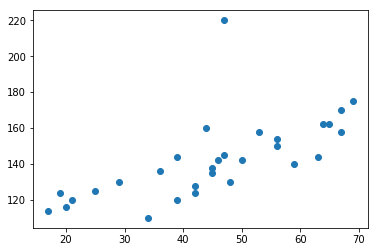

In [11]:
plt.scatter(datos["Edad"], datos["Presión Sangre"])

### Localización

In [12]:
print("Primer cuartil: ", np.percentile(datos["Edad"], 25)) # Percentil 25 o primer cuartil
print("Segundo cuartil (mediana): ", np.percentile(datos["Edad"], 50)) # Percentil 50 o segundo cuartil
print("Tercer cuartil: ", np.percentile(datos["Edad"], 75)) # Percentil 75 o tercer cuartil

Primer cuartil:  36.75
Segundo cuartil (mediana):  45.5
Tercer cuartil:  56.0


El gráfico de cajas y bigotes representa las medidas de posición principales de los datos y permite además detectar datos atípicos.

{'boxes': [<matplotlib.lines.Line2D at 0x2e353179b38>],
 'caps': [<matplotlib.lines.Line2D at 0x2e353183588>,
 'fliers': [<matplotlib.lines.Line2D at 0x2e35318d240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2e353183dd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2e353179c88>,
  <matplotlib.lines.Line2D at 0x2e353183160>]}

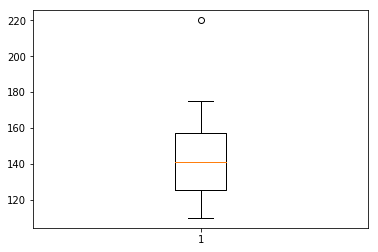

In [13]:
plt.boxplot(datos["Presión Sangre"])

El comando `describe()` resume el conjunto de datos por variable sacando los descriptivos más frecuentemente empleados.

In [14]:
# Describe
datos.describe()

,Indice,Uno,Edad,Presión Sangre
count,30.000000,30.0,30.000000,30.000000
mean,15.500000,1.0,45.133333,142.533333
std,8.803408,0.0,15.294203,22.581245
min,1.000000,1.0,17.000000,110.000000
25%,8.250000,1.0,36.750000,125.750000
50%,15.500000,1.0,45.500000,141.000000
75%,22.750000,1.0,56.000000,157.000000
max,30.000000,1.0,69.000000,220.000000
